In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importação de métodos de validação e medidas de desempenho

## Métodos de validação

In [2]:
from sklearn.model_selection import train_test_split # Holdout
from sklearn.model_selection import StratifiedKFold # Cross-validation

## Medidas de desempenho

In [3]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay # Matriz de confusão
from sklearn.metrics import accuracy_score # Acurácia

# Definições auxiliares

## Funções para plot de linhas de decisão

In [4]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_data_and_boudaries(clf, X, Y, row=1, column=1, index=1, title='', x_label='', y_label=''):
    ax = plt.subplot(row, column, index)
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
    return ax

# Dados1

In [5]:
dataset = pd.read_csv('../datasets/dados1.csv')

In [6]:
dataset.head()

,V1,V2,V3
0,3.593917,-6.403765,1
1,1.879632,-9.968132,1
2,6.764671,-5.860354,1
3,-3.284518,-7.496510,1
4,2.412762,-6.015894,1


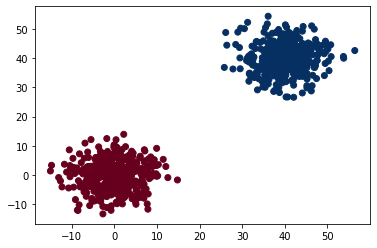

In [7]:
plt.scatter(dataset.V1, dataset.V2, c=dataset.V3, cmap='RdBu')

In [8]:
X = dataset.values[:, :-1]
Y = dataset.values[:, -1]

## MLP

In [9]:
from sklearn.neural_network import MLPClassifier

### Holdout

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=42)

In [11]:
mlp = MLPClassifier(hidden_layer_sizes=(1), max_iter=5000, random_state=42)
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Linha de decisão

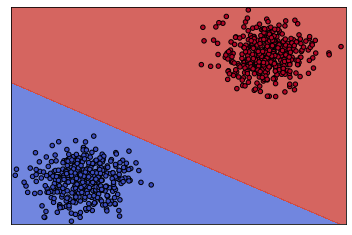

In [12]:
plot_data_and_boudaries(mlp, X, Y)

##### Acurácia

In [13]:
accuracy_score(mlp.predict(X_test), Y_test)

1.0

##### Matriz de confusão

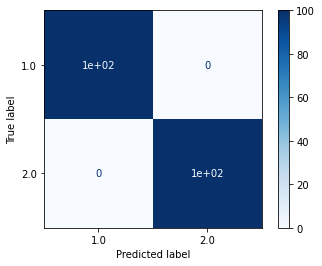

In [14]:
plot_confusion_matrix(mlp, X_test, Y_test, cmap='Blues')

### Cross-validation

In [15]:
skf = StratifiedKFold()

In [16]:
mlps = []

for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    mlp = MLPClassifier(hidden_layer_sizes=(1), max_iter=5000, random_state=42)
    mlp.fit(X_train, Y_train)
    mlps.append(mlp)

#### Linha de decisão

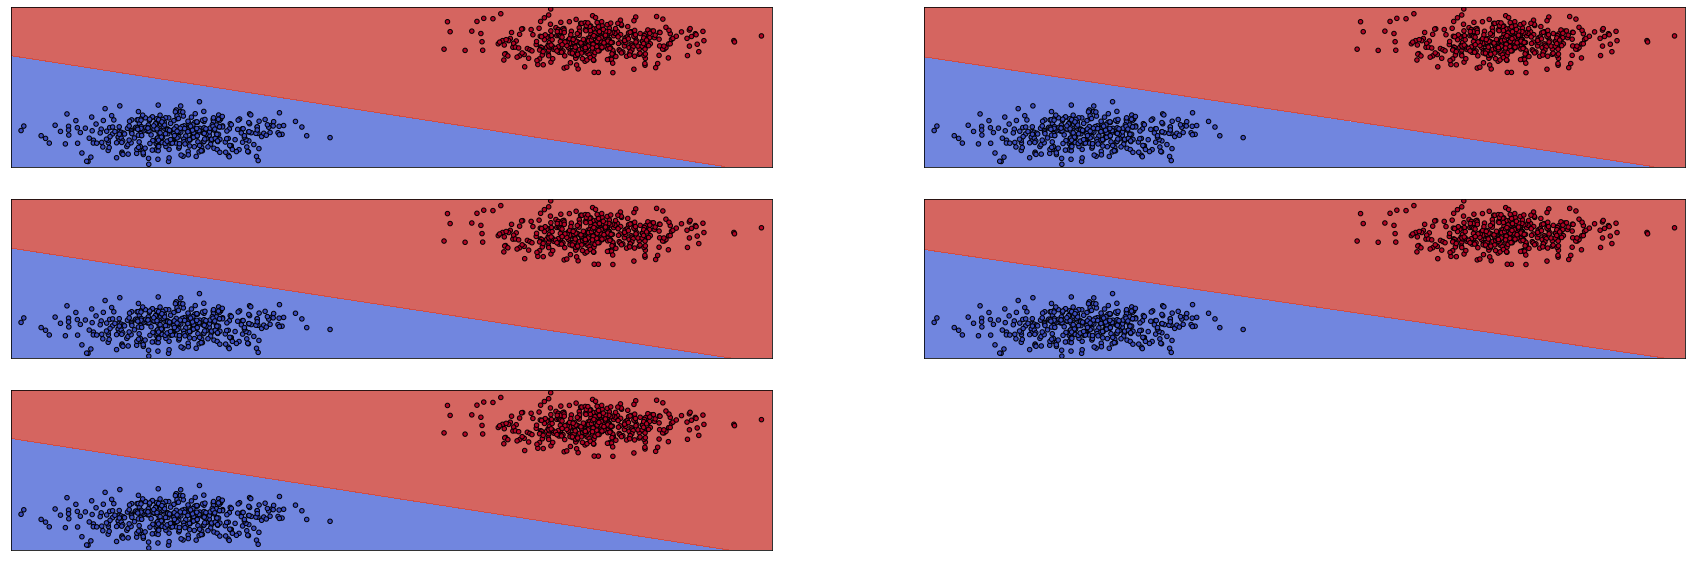

In [17]:
columns = 2
rows = (skf.get_n_splits() // columns) + 1
rows

plt.figure(figsize=(10 * rows, 10))

for i in range(skf.get_n_splits()):
    plot_data_and_boudaries(mlps[i], X, Y, rows, columns, i+1)

##### Acurácia

In [18]:
scores = []

i = 0
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    score = accuracy_score(mlps[i].predict(X_test), Y_test)    
    scores.append(score)
    i += 1

scores

[1.0, 1.0, 1.0, 1.0, 1.0]

##### Matriz de confusão

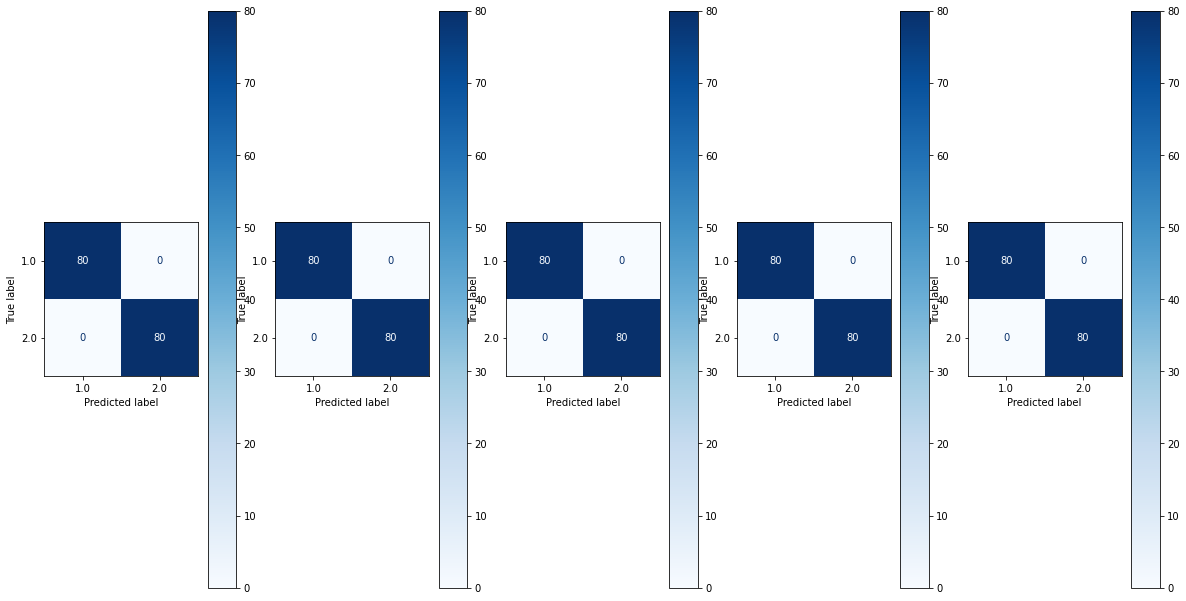

In [19]:
plt.figure(figsize=(20, 100))

i = 0
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    plot_confusion_matrix(mlps[i], X_test, Y_test, cmap='Blues', ax=plt.subplot(1, 5, i+1))
    i += 1

## SVM

In [20]:
from sklearn.svm import SVC

### Holdout

In [21]:
svm = SVC(kernel='linear')
svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Linha de decisão

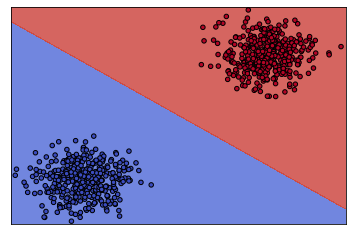

In [22]:
plot_data_and_boudaries(svm, X, Y)

##### Acurácia

In [23]:
accuracy_score(svm.predict(X_test), Y_test)

1.0

##### Matriz de confusão

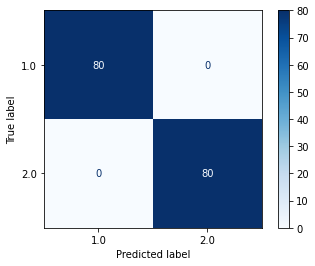

In [24]:
plot_confusion_matrix(svm, X_test, Y_test, cmap='Blues')

### Cross-validation

In [25]:
skf = StratifiedKFold()

In [26]:
svms = []

for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    svm = SVC(kernel='linear')
    svm.fit(X_train, Y_train)
    svms.append(svm)

#### Linha de decisão

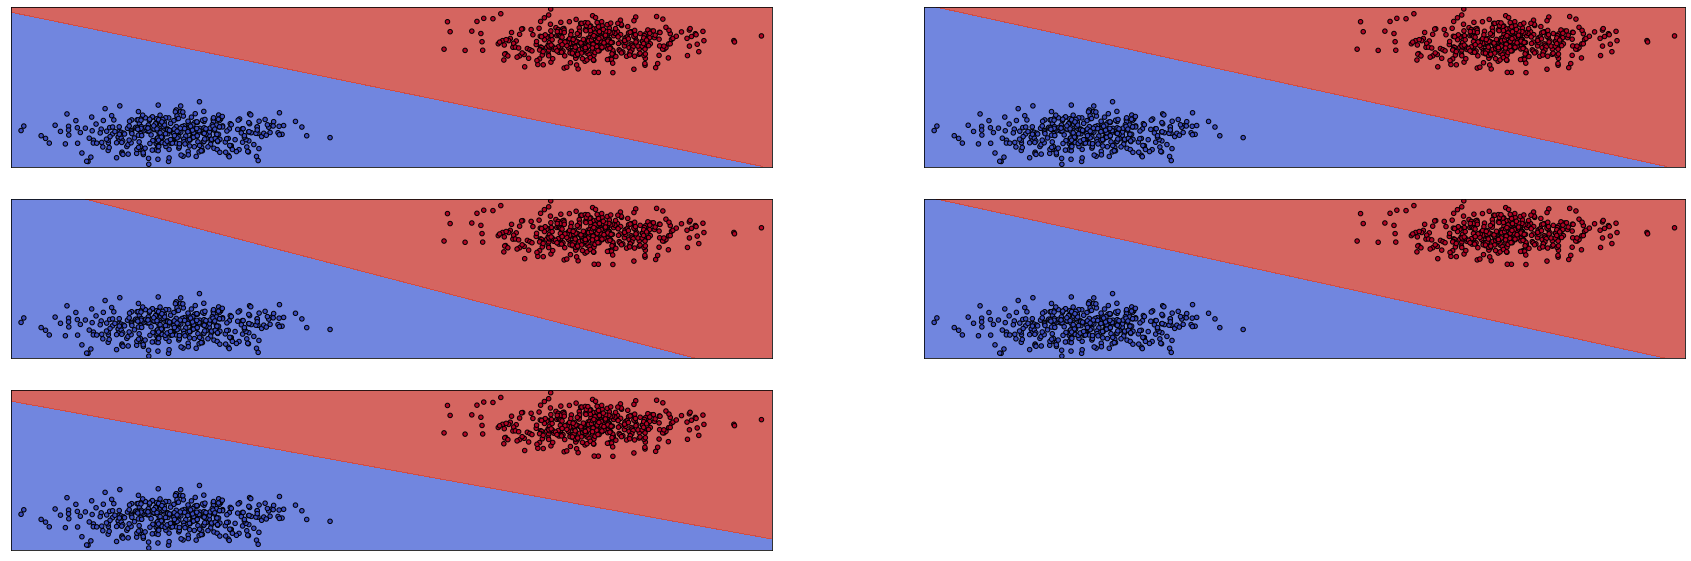

In [27]:
columns = 2
rows = (skf.get_n_splits() // columns) + 1
rows

plt.figure(figsize=(10 * rows, 10))

for i in range(skf.get_n_splits()):
    plot_data_and_boudaries(svms[i], X, Y, rows, columns, i+1)

##### Acurácia

In [28]:
scores = []

i = 0
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    score = accuracy_score(svms[i].predict(X_test), Y_test)    
    scores.append(score)
    i += 1

scores

[1.0, 1.0, 1.0, 1.0, 1.0]

##### Matriz de confusão

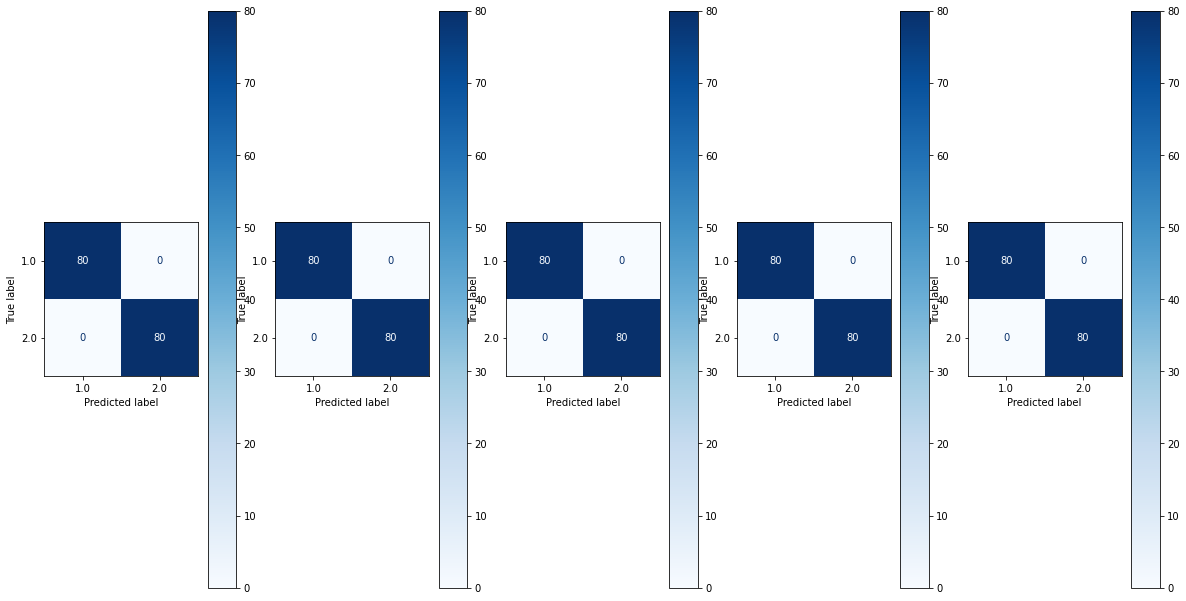

In [29]:
plt.figure(figsize=(20, 100))

i = 0
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    plot_confusion_matrix(svms[i], X_test, Y_test, cmap='Blues', ax=plt.subplot(1, 5, i+1))
    i += 1

# Dados2

In [30]:
dataset = pd.read_csv('../datasets/dados2.csv')

In [31]:
dataset.head()

,V1,V2,V3
0,-3.652528,-6.912819,1
1,3.649545,4.693431,1
2,0.611923,6.183120,1
3,6.422804,-9.841413,1
4,-1.840162,-1.126978,1


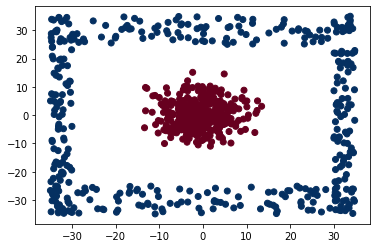

In [32]:
plt.scatter(dataset.V1, dataset.V2, c=dataset.V3, cmap='RdBu')

In [33]:
X = dataset.values[:, :-1]
Y = dataset.values[:, -1]

## MLP

In [34]:
from sklearn.neural_network import MLPClassifier

### Holdout

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=42)

In [36]:
mlp = MLPClassifier(hidden_layer_sizes=(6), max_iter=5000, random_state=42)
mlp.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=6, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

#### Linha de decisão

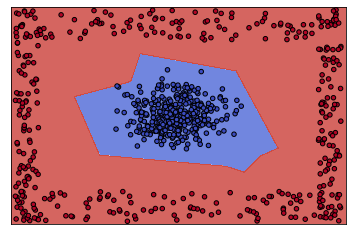

In [37]:
plot_data_and_boudaries(mlp, X, Y)

##### Acurácia

In [38]:
accuracy_score(mlp.predict(X_test), Y_test)

1.0

##### Matriz de confusão

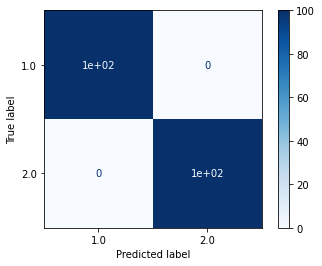

In [39]:
plot_confusion_matrix(mlp, X_test, Y_test, cmap='Blues')

### Cross-validation

In [40]:
skf = StratifiedKFold()

In [41]:
mlps = []

for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    mlp = MLPClassifier(hidden_layer_sizes=(6), max_iter=5000, random_state=42)
    mlp.fit(X_train, Y_train)
    mlps.append(mlp)

#### Linha de decisão

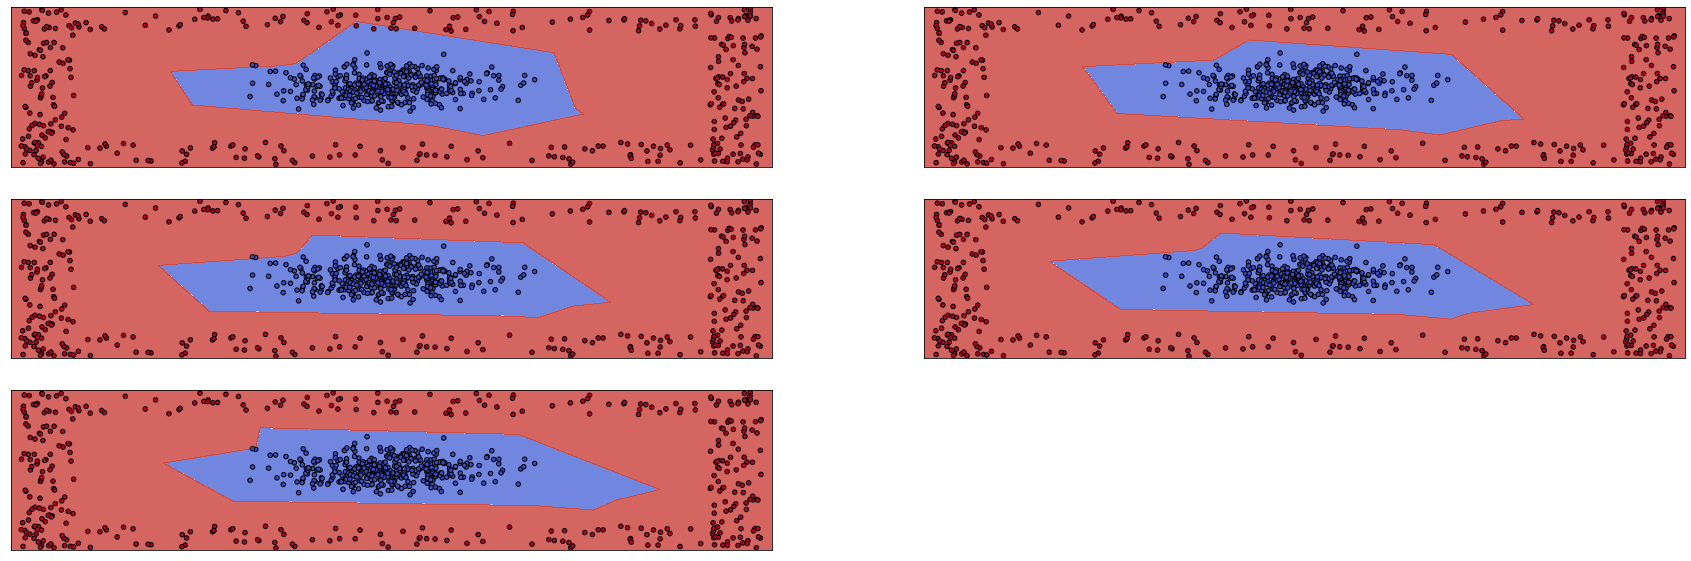

In [42]:
columns = 2
rows = (skf.get_n_splits() // columns) + 1
rows

plt.figure(figsize=(10 * rows, 10))

for i in range(skf.get_n_splits()):
    plot_data_and_boudaries(mlps[i], X, Y, rows, columns, i+1)

##### Acurácia

In [43]:
scores = []

i = 0
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    score = accuracy_score(mlps[i].predict(X_test), Y_test)    
    scores.append(score)
    i += 1

scores

[0.98125, 1.0, 0.9875, 1.0, 1.0]

##### Matriz de confusão

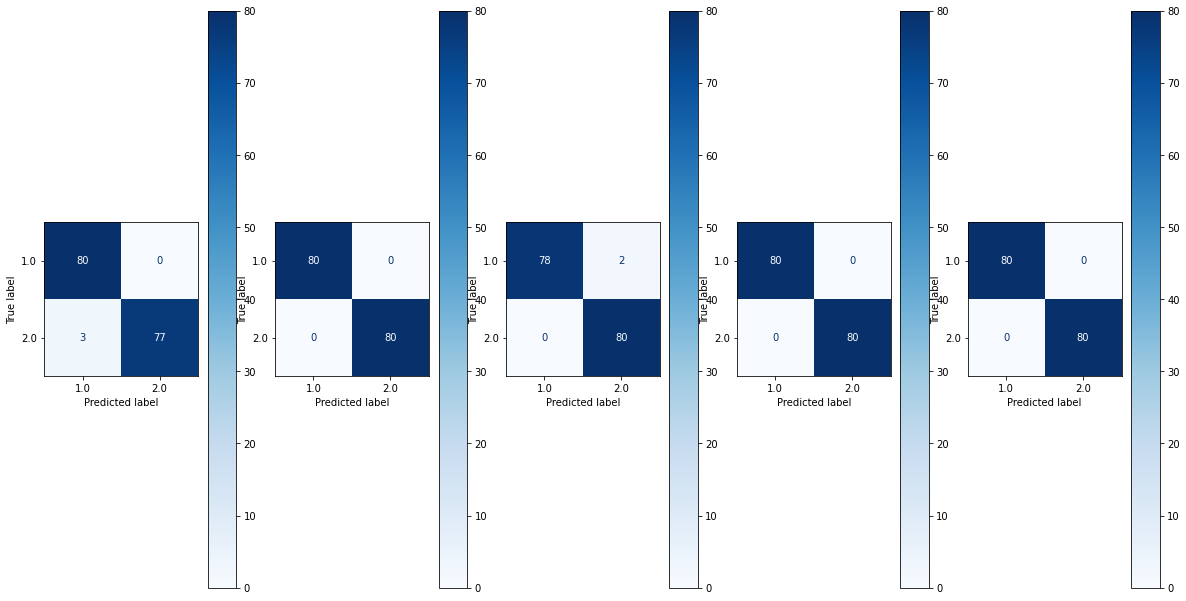

In [44]:
plt.figure(figsize=(20, 100))

i = 0
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    plot_confusion_matrix(mlps[i], X_test, Y_test, cmap='Blues', ax=plt.subplot(1, 5, i+1))
    i += 1

## SVM

In [45]:
from sklearn.svm import SVC

### Holdout

In [46]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

#### Linha de decisão

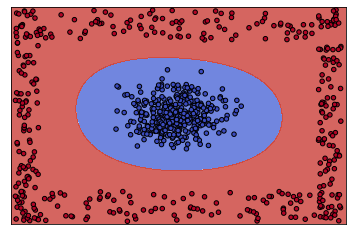

In [47]:
plot_data_and_boudaries(svm, X, Y)

##### Acurácia

In [48]:
accuracy_score(svm.predict(X_test), Y_test)

1.0

##### Matriz de confusão

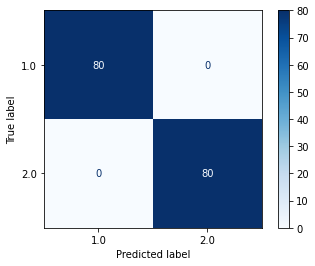

In [49]:
plot_confusion_matrix(svm, X_test, Y_test, cmap='Blues')

### Cross-validation

In [50]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold()

In [51]:
svms = []

for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_train, Y_train)
    svms.append(svm)

#### Linha de decisão

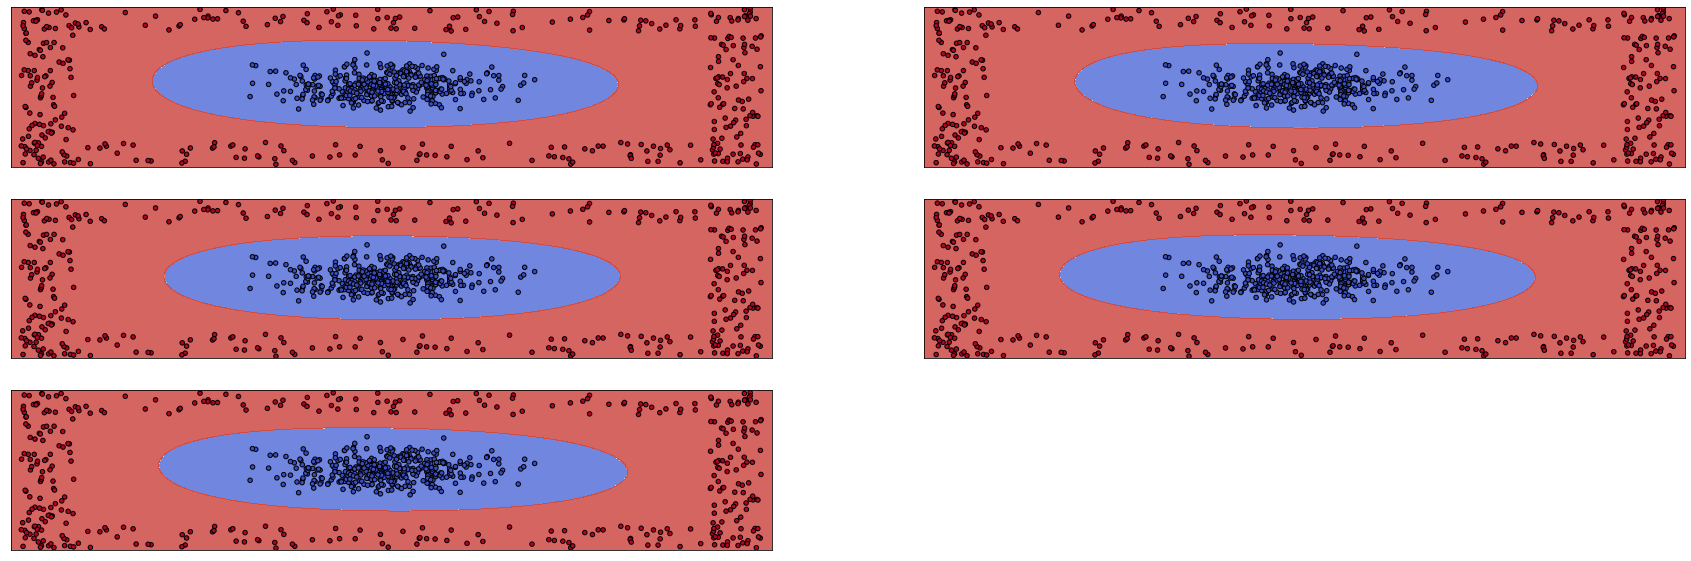

In [52]:
columns = 2
rows = (skf.get_n_splits() // columns) + 1
rows

plt.figure(figsize=(10 * rows, 10))

for i in range(skf.get_n_splits()):
    plot_data_and_boudaries(svms[i], X, Y, rows, columns, i+1)

##### Acurácia

In [53]:
scores = []

i = 0
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    score = accuracy_score(svms[i].predict(X_test), Y_test)    
    scores.append(score)
    i += 1

scores

[1.0, 1.0, 1.0, 1.0, 1.0]

##### Matriz de confusão

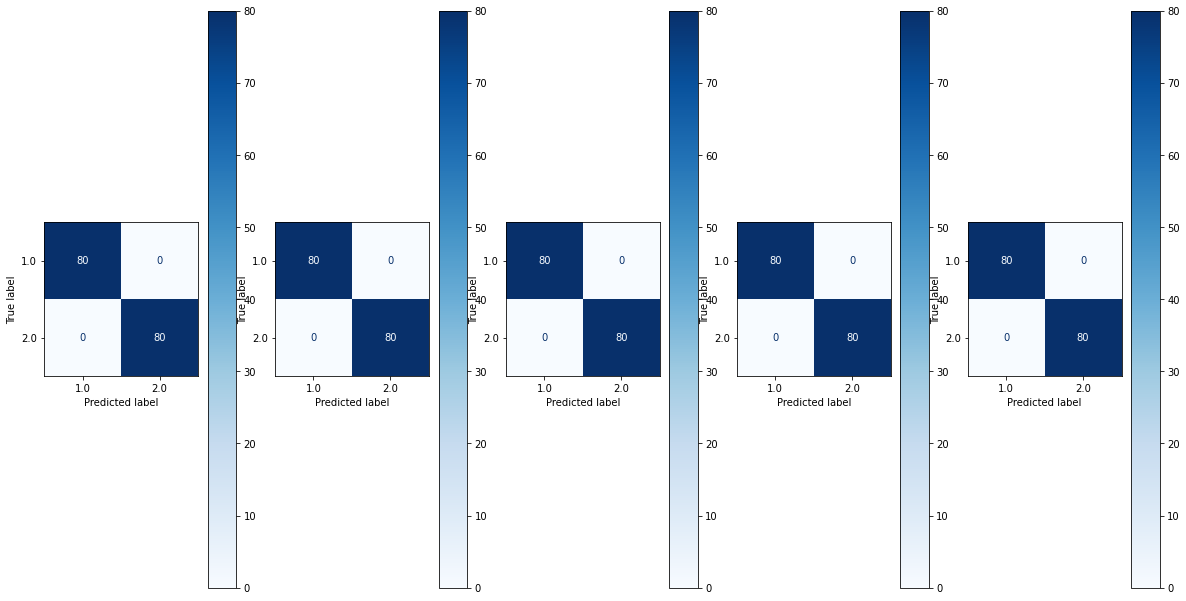

In [54]:
plt.figure(figsize=(20, 100))

i = 0
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    plot_confusion_matrix(svms[i], X_test, Y_test, cmap='Blues', ax=plt.subplot(1, 5, i+1))
    i += 1

# Conclusões

Apesar de ter o resultado de 100% de acurácia com quantidade suficente de iterações, as MPL apresentam variação quando o método de avaliação utilizado é o K-Fold Cross-Validation. Em contrapartida, o SVM não apresenta essa variação pois consegue traçar a linha de decisão com uma boa margem entre as duas classes


Essa variação das MLP se mostra mais presente ainda quando os dados possuem uma distribuição onde é necessária uma forma 'circular' para separar as classes, como no conjunto de dados 2. No método K-Fold Cross-Validation, os hiperplanos separadores sofreram bastante variação de acordo com qual Fold foi utilizado no treinamento. O que não aconteceu no SVM.

Vale ressaltar que foi necessária a mudança do kernel das SVM de 'linear' para 'rbf'